# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load DATASET

In [2]:
df = pd.read_csv(r"D:\\Artificial Intelligence\\insurance Price Prediction\\Insurance price predictin\\insurance.csv")

In [3]:
# display starting 5 row
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Dispaly end 5 row
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Check shape of the df
df.shape

(1338, 7)

In [6]:
print("Shape of row in df :",df.shape[0]) # 0 indicates row
print("Shape of column in df :",df.shape[1]) # 1 indicates column

Shape of row in df : 1338
Shape of column in df : 7


In [7]:
# Display total information about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Check null values in the df
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# check overall statics
df.describe(include ='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# convert string into numerical values('sex','smoker','region)
### Method 1(by coding )

#### 'Sex'

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['sex'] = df['sex'].map({'female':0,'male':1})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


#### 'smoker'

In [14]:
print(df['smoker'].value_counts())
print("****************************************")

print(df['smoker'].unique())
print("****************************************")

no     1064
yes     274
Name: smoker, dtype: int64
****************************************
['yes' 'no']
****************************************


In [15]:
df['smoker'] = df['smoker'].map({'no':0,'yes':1})

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


#### 'region'

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
df['region'] = df['region'].map({'southwest':'1','southeast':2,'northwest':3,'northeast':4})

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [22]:
X = df.drop(['charges'],axis = 1)
y = df['charges']

In [23]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [24]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Train test split df

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train ,y_test = train_test_split(X , y ,test_size=0.2)

# Import the models

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Training

In [27]:
lr = LinearRegression()
print(lr.fit(X_train,y_train))
svm= SVR()
print(svm.fit(X_train,y_train))
rf = RandomForestRegressor()
print(rf.fit(X_train,y_train))
gr = GradientBoostingRegressor()
print(gr.fit(X_train,y_train))


LinearRegression()
SVR()
RandomForestRegressor()
GradientBoostingRegressor()


## Prediction o Test data

In [28]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [29]:
df2 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                   'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [30]:
df2

,Actual,Lr,svm,rf,gr
513,1256.29900,1740.482040,9205.578053,2637.447381,1964.542065
925,25333.33284,12984.824480,9381.565210,10430.294279,11745.746137
1015,12124.99240,11199.402756,9427.095819,16541.926972,14931.130221
853,11729.67950,11087.507294,9394.579335,16247.800544,14859.536074
674,46200.98510,38240.020537,9345.545254,45925.268772,45179.484054
...,...,...,...,...,...
146,40720.55105,35207.405198,9354.445285,45417.503063,42158.200211
694,3577.99900,6037.798306,9237.057194,3986.387499,5235.008286
475,28868.66390,36982.297299,9438.017590,28869.320835,30259.103515
538,8233.09750,9069.222998,9352.904749,9218.807506,8930.129126


# compare performance 

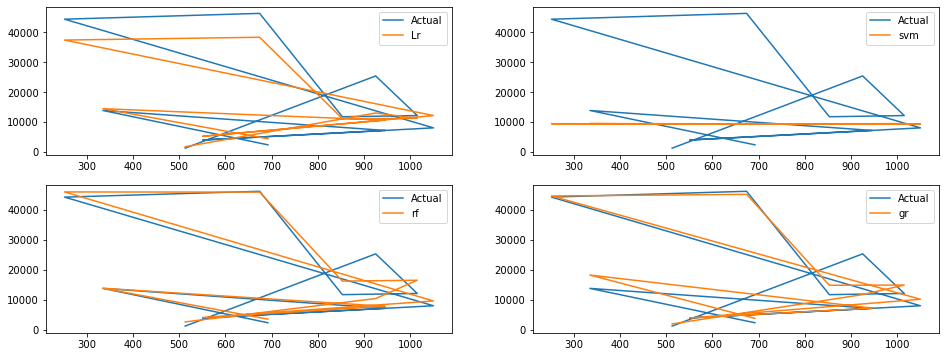

In [31]:
plt.figure(figsize = (16,6))
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df2['Lr'].iloc[0:11],label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df2['svm'].iloc[0:11],label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df2['rf'].iloc[0:11],label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df2['gr'].iloc[0:11],label = 'gr')
plt.legend()

plt.show()

# evaulating the algorithm

In [32]:
from sklearn import metrics

In [33]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [34]:
# in r2 error  higher value is better
print("lr score:",score1)
print("***************************")
print("svm score:",score2)
print("***************************")
print("rf score:",score3)
print("***************************")
print("gr score:",score4)
print("***************************")

lr score: 0.7788261299855505
***************************
svm score: -0.0824390450071315
***************************
rf score: 0.8464912399166248
***************************
gr score: 0.870804319346156
***************************


In [35]:
# in mean_absolute_error the lower  value is better 
s1 = metrics.mean_absolute_error(y_test,y_pred1)
print(s1)
print("***************************************")
s2 = metrics.mean_absolute_error(y_test,y_pred2)
print(s2)
print("***************************************")
s3 = metrics.mean_absolute_error(y_test,y_pred3)
print(s3)
print("***************************************")
s4 = metrics.mean_absolute_error(y_test,y_pred4)
print(s4)
print("***************************************")

3843.2200444381515
***************************************
7858.290980356169
***************************************
2474.3616965451556
***************************************
2356.002024394187
***************************************


# Predict chargees for new customer

In [36]:
data = {'age':40,
       'sex':1,
        'bmi': 40.30,
        'children':4,
        'smoker':1,
        'region':2}
df = pd.DataFrame(data,index = [0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [37]:
new_pred = gr.predict(df)
print(new_pred)

[43205.06728248]


# Save model using joblib library

In [38]:
# take best model and train entire data set
gr = GradientBoostingRegressor()
print(gr.fit(X,y))

GradientBoostingRegressor()


In [39]:
import joblib

In [40]:
joblib.dump(gr,"model_joblib_gr")

['model_joblib_gr']

In [41]:
model  = joblib.load('model_joblib_gr') #model successufly loaded

In [42]:
model.predict(df)

array([42148.361888])

# Gui 

In [43]:
from tkinter import *

In [44]:
import joblib

In [45]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text = "Insurance cost").grid(row = 7)
    Label(master,text = result).grid(row=8)

master = Tk()
master.title("Insuarance cost Prediction")
label = Label(master,text="Insurance cost Prediction",bg = "black",fg = "white").grid(row=0,columnspan = 2)
Label(master,text = "Enter your age").grid(row = 1)
Label(master,text = "male or female [1/0]").grid(row = 2)
Label(master,text = "Enter your BMI value").grid(row = 3)
Label(master,text = "Enter number of children").grid(row = 4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row = 5)
Label(master,text = "Region [1-4]").grid(row = 6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master,text = "Predict",command = show_entry).grid()

mainloop()